In [19]:
#필요 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../../DataPreprocessing/sort_asc/data1_sorted_asc.csv')
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183696 entries, 0 to 1183695
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   행정동코드    1183696 non-null  int64  
 1   시도명      1183696 non-null  object 
 2   시군구명     1183696 non-null  object 
 3   행정동명     1183696 non-null  object 
 4   기준일자     1183696 non-null  int64  
 5   성별       1183696 non-null  object 
 6   연령대      1183696 non-null  object 
 7   소비인구(명)  1183696 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 72.2+ MB
None


In [11]:
#연령대의 데이터가 xx가 아니고 20~40 사이 데이터만 추출
numeric_age = pd.to_numeric(df['연령대'], errors='coerce')
cond1 = (numeric_age >= 20)
cond2 = (numeric_age <= 40)
cond3 = pd.notna(numeric_age)

condition = (cond1 & cond2 & cond3)

result = df[condition]
print(result)


              행정동코드    시도명 시군구명  행정동명      기준일자 성별 연령대     소비인구(명)
0        1165053000  서울특별시  서초구  서초3동  20230501  F  25  144.027005
2        1111064000  서울특별시  종로구   이화동  20230501  F  20  152.028506
3        1111064000  서울특별시  종로구   이화동  20230501  F  25  208.039008
4        1111064000  서울특별시  종로구   이화동  20230501  F  30  136.025505
5        1111064000  서울특별시  종로구   이화동  20230501  F  35   80.015003
...             ...    ...  ...   ...       ... ..  ..         ...
1183679  1165055000  서울특별시  서초구  반포본동  20231031  M  30   23.603037
1183687  1165054000  서울특별시  서초구   잠원동  20231031  M  25   94.412146
1183690  1165054000  서울특별시  서초구   잠원동  20231031  F  30  102.279825
1183691  1165054000  서울특별시  서초구   잠원동  20231031  F  35  133.750540
1183692  1174070000  서울특별시  강동구  둔촌2동  20231031  M  25   62.941431

[562496 rows x 8 columns]


In [14]:
# 데이터들을 날짜 기준으로 묶기
Date_sum = result.groupby('기준일자')['소비인구(명)'].sum().reset_index()
# 소수점 둘째짜리까지 반올림하기
Date_sum['소비인구(명)'] = Date_sum['소비인구(명)'].round(2)
print(Date_sum)

         기준일자    소비인구(명)
0    20230501  194740.51
1    20230502  246374.20
2    20230503  248278.55
3    20230504  250238.92
4    20230505  256520.10
..        ...        ...
179  20231027  260317.89
180  20231028  264401.22
181  20231029  265825.26
182  20231030  288767.42
183  20231031  298436.79

[184 rows x 2 columns]


In [15]:
Date_sum.to_csv('data_sum_youth', index=False, encoding='utf-8-sig')

In [17]:
# 머신러닝을 이용한 데이터 상관관계 분석
# 1.파일 읽어오기
try:
    sales_df = pd.read_csv('data_sum_youth')
    weather_df = pd.read_csv('weather_combined_2305-2310.csv')
    print('파일을 성공적으로 읽어왔습니다.')
except Exception as e:
    print(f'파일을 읽어오는 중 오류 발생 : {e}')

파일을 성공적으로 읽어왔습니다.


C:\Python1\Python313\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Python1\Python313\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Python1\Python313\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Python1\Python313\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Python1\Python313\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Python1\Python313\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\P

LinAlgError: SVD did not converge in Linear Least Squares

C:\Python1\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Python1\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Python1\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Python1\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Python1\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Python1\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Arial.
  func(*

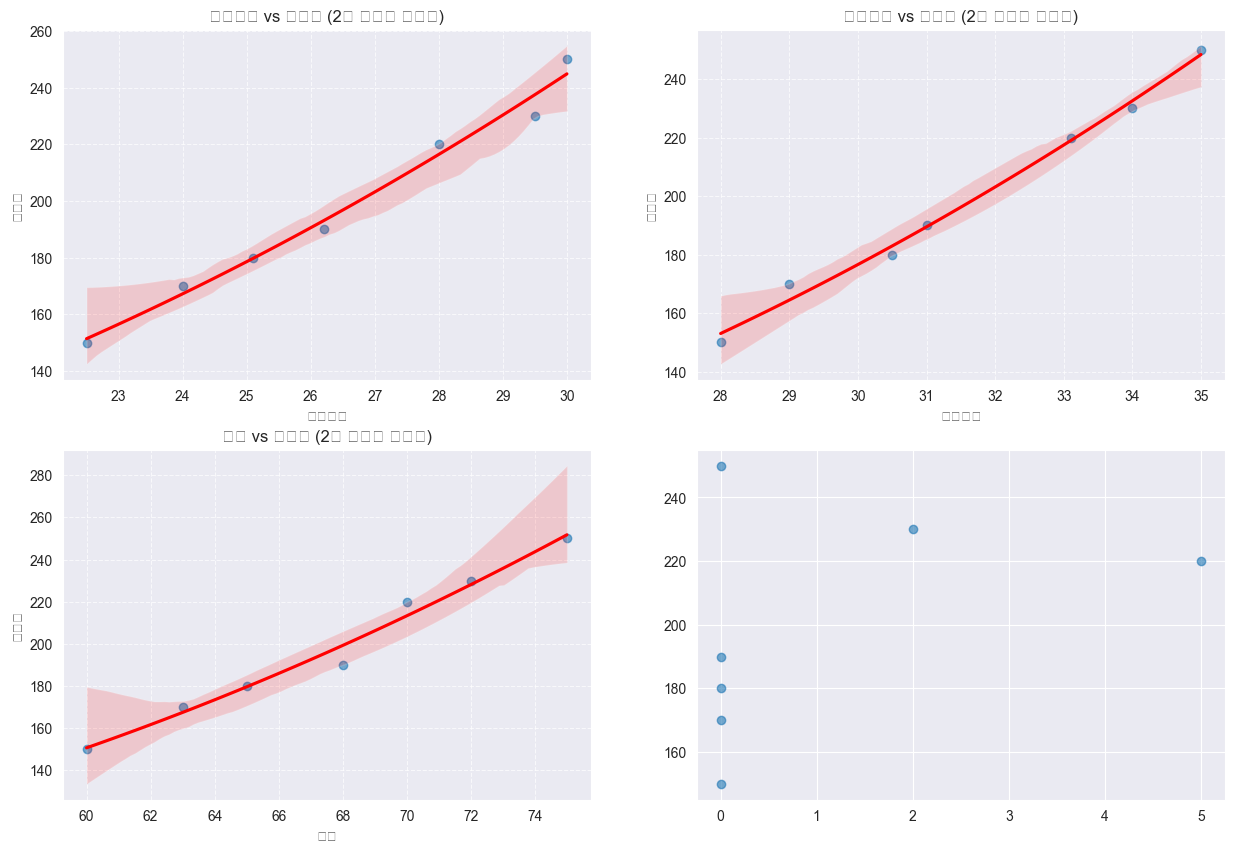

In [18]:
# 2. 데이터의 상관관계를 눈으로 먼저 분석하기 시각화하기 -> 산점도로 표현
